# Course project part 1 | Technical Analysis on S&P 500 data

## Student name: Vilchis Razo Luis Alfredo
## Tuition: A01796353

# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
# Installing libraries

%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

In [2]:
# Importing libraries

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500

df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
# Analysis dates

start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
# Obtaining the closing price of the 500 stocks in the S&P 500 index

# We ensure that the symbols are in the correct format for yfinance

ticker_list = df_tickers['Symbol'].str.replace('.', '-', regex=False).tolist()

# Mass download of historical closing data

df_close = yf.download(
    tickers=ticker_list,
    start=start_date,
    end=end_date,
    interval='1d',
    group_by='ticker',
    auto_adjust=False,
    threads=True,
    progress=True
)

# Select the 'Close' price from the multi-level column index

df_close = df_close.loc[:, (slice(None), 'Close')]
df_close.columns = df_close.columns.get_level_values(0)


# We show the final DataFrame with closing prices

display(df_close)

[*********************100%***********************]  503 of 503 completed


Ticker,PLTR,VZ,IQV,BR,NUE,TAP,DGX,ADSK,DRI,TDG,...,ACGL,CAH,UBER,EBAY,K,ELV,KMB,CDW,L,NKE
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,22.120001,39.200001,232.940002,193.429993,168.669998,57.080002,137.550003,210.710007,151.149994,1249.319946,...,95.800003,102.169998,67.790001,51.060001,56.980000,524.840027,136.470001,214.610001,76.279999,90.339996
2024-05-02,22.549999,38.930000,222.139999,195.350006,170.520004,57.799999,136.339996,209.949997,147.860001,1271.780029,...,95.169998,102.980003,68.570000,49.389999,61.279999,525.609985,136.500000,218.410004,76.529999,92.410004
2024-05-03,23.330000,38.889999,223.369995,198.850006,173.919998,57.849998,137.380005,215.190002,149.250000,1293.800049,...,94.410004,98.910004,69.230003,49.650002,60.509998,526.960022,136.089996,219.559998,76.400002,92.150002
2024-05-06,25.209999,39.330002,227.039993,200.679993,171.020004,57.270000,135.639999,216.699997,147.479996,1301.630005,...,97.139999,98.589996,71.510002,49.380001,60.040001,529.929993,135.970001,221.820007,77.739998,93.360001
2024-05-07,21.400000,39.310001,229.139999,201.360001,171.789993,58.270000,136.940002,214.619995,147.029999,1310.400024,...,98.209999,99.720001,70.430000,50.070000,61.639999,536.169983,135.979996,220.679993,77.809998,93.779999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,107.779999,42.810001,150.679993,238.130005,115.290001,58.349998,175.869995,271.709991,200.440002,1368.020020,...,92.099998,135.839996,78.099998,67.199997,82.769997,428.790009,132.339996,158.940002,86.239998,58.480000
2025-04-25,112.779999,41.910000,150.279999,237.720001,115.720001,56.799999,173.759995,269.929993,199.100006,1378.130005,...,90.680000,137.559998,77.750000,67.830002,82.620003,421.679993,131.610001,157.949997,85.269997,57.619999
2025-04-28,114.650002,42.389999,150.130005,237.179993,116.570000,56.700001,176.679993,271.470001,200.369995,1395.719971,...,91.190002,138.240005,78.330002,66.320000,82.440002,413.820007,130.899994,158.589996,85.959999,57.310001


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [8]:
#Identifying golden and death crosses
#Obtaining 50- and 200-day moving averages

# We calculate the 50-day moving average (MA50)

df_ma50 = df_close.rolling(window=50).mean()

# We calculate the 200-day moving average (MA200)

df_ma200 = df_close.rolling(window=200).mean()

# We show the results

display(df_ma50)
display(df_ma200)

Ticker,PLTR,VZ,IQV,BR,NUE,TAP,DGX,ADSK,DRI,TDG,...,ACGL,CAH,UBER,EBAY,K,ELV,KMB,CDW,L,NKE
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,91.4010,43.4884,175.3414,235.390800,124.6604,59.9438,169.1644,267.783799,196.669001,1339.832798,...,91.7206,130.3902,74.2036,66.4772,82.4022,416.556801,139.525399,167.0236,86.0244,68.1540
2025-04-25,91.3088,43.5160,174.3906,235.297600,124.3038,60.0108,169.3526,267.236799,196.754801,1340.326199,...,91.7690,130.6002,74.1716,66.4750,82.4110,417.277200,139.479999,166.4038,86.0698,67.8612
2025-04-28,91.2436,43.5430,173.4722,235.186200,123.9242,59.9740,169.5118,266.596599,196.893001,1341.521399,...,91.7896,130.8294,74.1324,66.4162,82.4156,417.721600,139.390799,165.8238,86.1066,67.5432


Ticker,PLTR,VZ,IQV,BR,NUE,TAP,DGX,ADSK,DRI,TDG,...,ACGL,CAH,UBER,EBAY,K,ELV,KMB,CDW,L,NKE
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,61.76740,42.01530,208.95175,224.05115,138.36915,56.89125,157.55235,276.19835,173.20300,1318.508248,...,98.59505,117.93060,71.33125,62.94055,78.84490,448.631402,137.76495,195.20345,82.57930,75.27435
2025-04-25,62.19435,42.01835,208.63790,224.23980,138.19650,56.92555,157.72935,276.32820,173.49705,1319.046599,...,98.55845,118.13835,71.36340,63.01645,78.97615,448.093602,137.72585,194.91920,82.63235,75.20015
2025-04-28,62.62550,42.02490,208.32865,224.42280,138.01255,56.95690,157.91050,276.45030,173.80860,1319.661798,...,98.52690,118.35160,71.40870,63.08315,79.10390,447.489751,137.67640,194.61780,82.68390,75.12400


### Detecting Golden and Death Crosses in the last 14 days

In [9]:
# Detection of Golden Crosses and Death Crosses in the last 14 days

# Function to detect crosses in the last 14 days

def detect_crosses(ma50, ma200, days=14):
    golden_crosses, death_crosses = [], []

    for ticker in ma50.columns:
        s50, s200 = ma50[ticker], ma200[ticker]

        # Make sure there is enough data

        valid_index = s50.dropna().index.intersection(s200.dropna().index)
        if len(valid_index) < 2:
            continue

        recent_dates = valid_index[-days:]

        for i in range(1, len(recent_dates)):
            prev_date, curr_date = recent_dates[i - 1], recent_dates[i]
            prev_diff = s50[prev_date] - s200[prev_date]
            curr_diff = s50[curr_date] - s200[curr_date]

            if prev_diff < 0 and curr_diff > 0:
                golden_crosses.append({'Date': curr_date, 'Ticker': ticker})
            elif prev_diff > 0 and curr_diff < 0:
                death_crosses.append({'Date': curr_date, 'Ticker': ticker})

    return pd.DataFrame(golden_crosses), pd.DataFrame(death_crosses)

df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_ma50, df_ma200, days=14)

In [10]:
# We detected crossings in the last 14 days

df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_ma50, df_ma200, days=14)

In [11]:
# We show the results

display(df_golden_cross_14d.sort_values('Ticker'))
display(df_death_cross_14d.sort_values('Ticker'))

,Date,Ticker
0,2025-04-28,AMT
1,2025-04-17,EW
3,2025-04-28,KDP
5,2025-04-28,MOH
4,2025-04-16,NEM
2,2025-04-14,TSN


,Date,Ticker
0,2025-04-11,ADSK
30,2025-04-21,AME
5,2025-04-23,AMP
9,2025-04-22,AMZN
53,2025-04-17,APD
33,2025-04-17,APO
28,2025-04-21,AXP
8,2025-04-14,BAC
36,2025-04-14,BLK
42,2025-04-22,CCL


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

First companies in alphabetical order (by symbol) that had a Golden Cross in the last 14 days:

1. AMT  - American Tower
2. EW   - Edwards Lifesciences
3. KDP  - Keurig Dr Pepper
4. MOH  - Molina Healthcare
5. NEM  - Newmont Corporation
6. TSN  - Tyson Foods


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol) that had a death cross in the last 14 days:

Top 10 companies in alphabetical order (by symbol) that had a Death Cross in the last 14 days:

1. ADSK  - Autodesk
2. AME   - AMETEK Inc.
3. AMP   - Ameriprise Financial
4. AMZN  - Amazon
5. APD   - Air Products and Chemicals
6. APO   - Apollo Global Management
7. AXP   - American Express
8. BAC   - Bank of America
9. BLK   - BlackRock
10. CCL  - Carnival Corporation


### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [12]:
# Visualization of the results

# For volatility, we'll use the standard deviation of each stock's daily logarithmic returns,
# which is a common metric for measuring historical volatility.

# We calculate the daily logarithmic returns

log_returns = np.log(df_close / df_close.shift(1))

# We calculate volatility as the standard deviation of the log daily returns,
# multiplied by the square root of 252 to annualize (252 trading days per year)

volatility = log_returns.std() * np.sqrt(252)

# We show the volatilities sorted alphabetically

volatility_sorted = volatility.sort_index()
display(volatility_sorted)

,0
Ticker,
A,0.297364
AAPL,0.323971
ABBV,0.276813
ABNB,0.413353
ABT,0.207211
...,...
XYZ,0.502147
YUM,0.220825
ZBH,0.235107


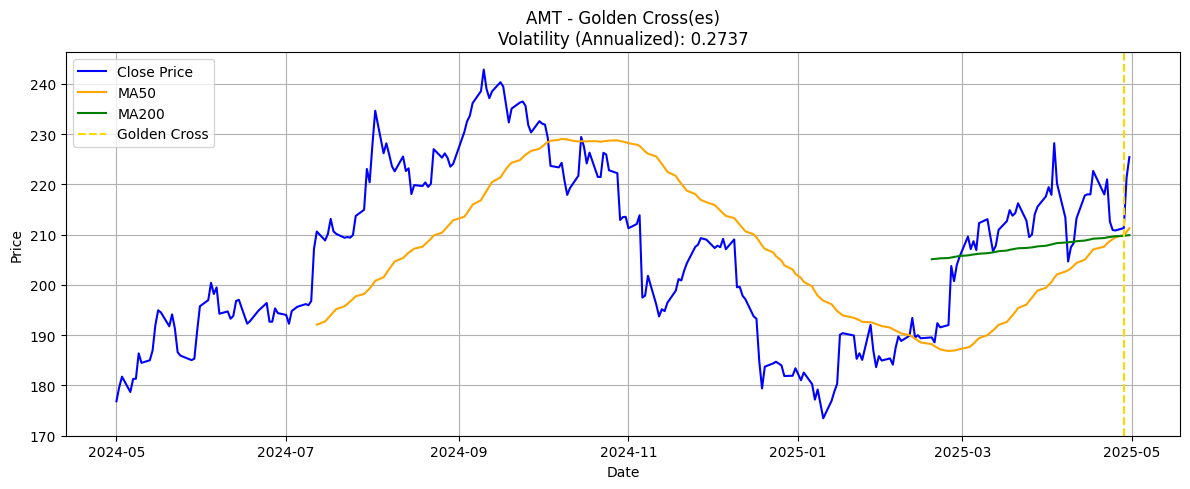

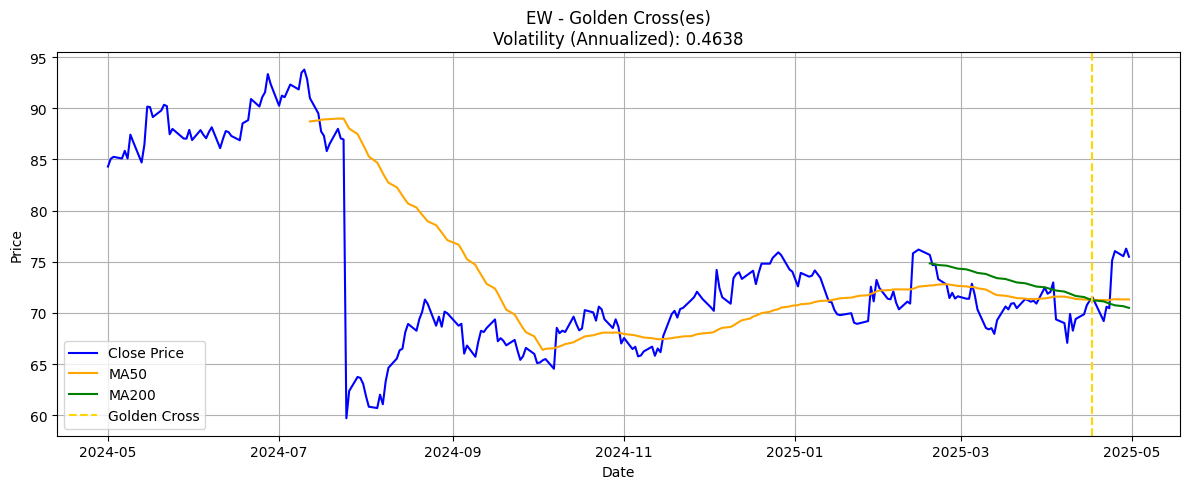

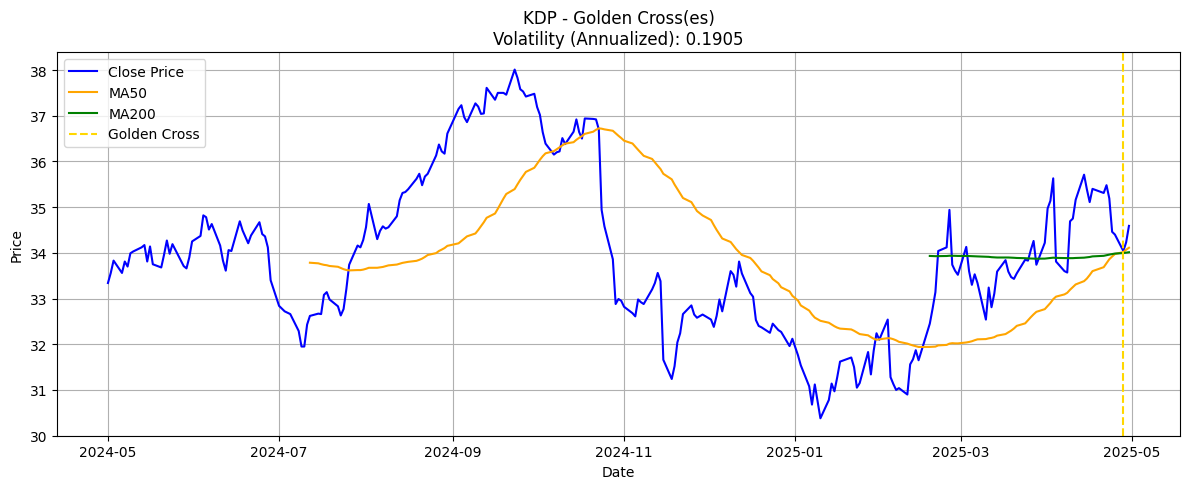

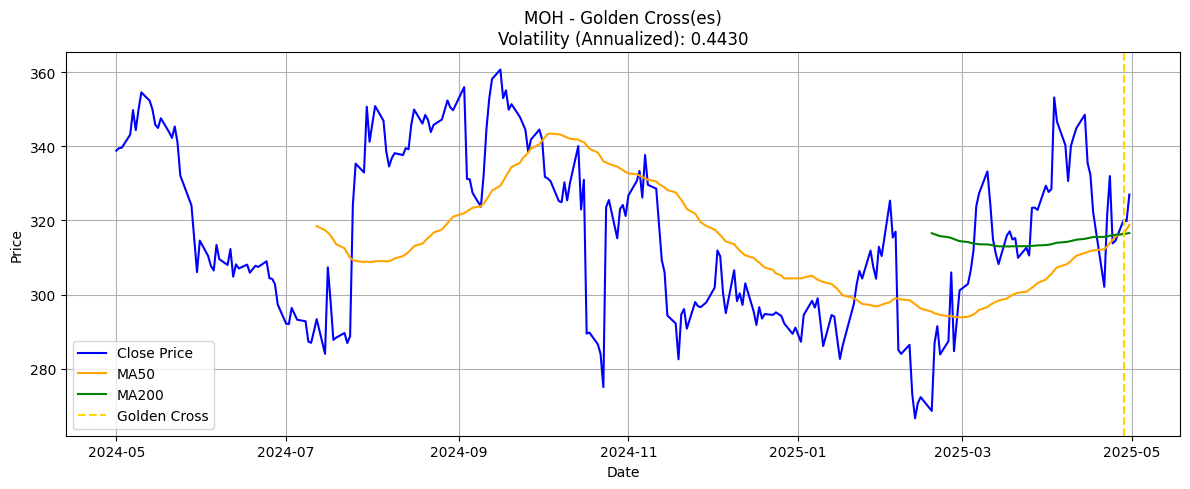

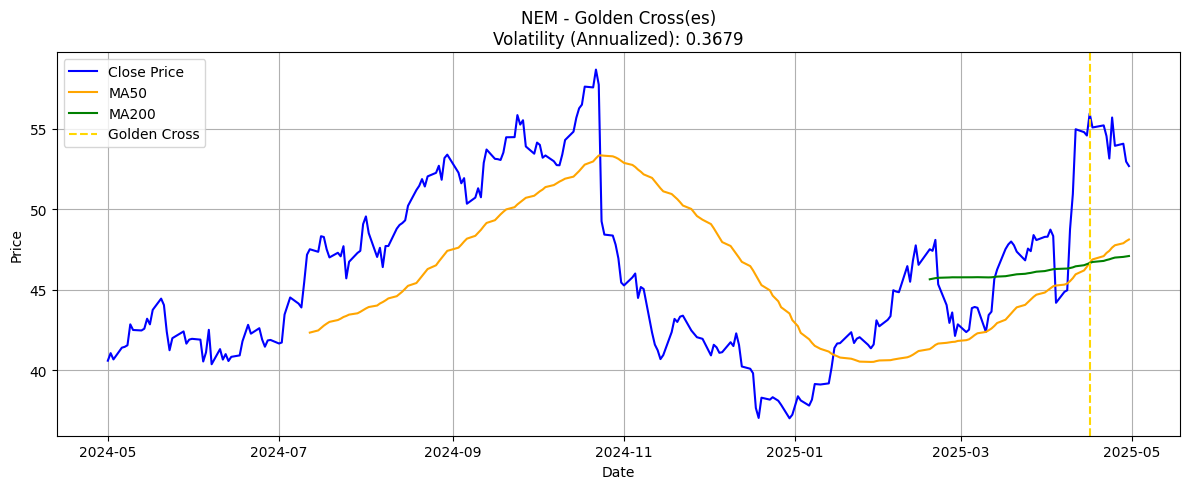

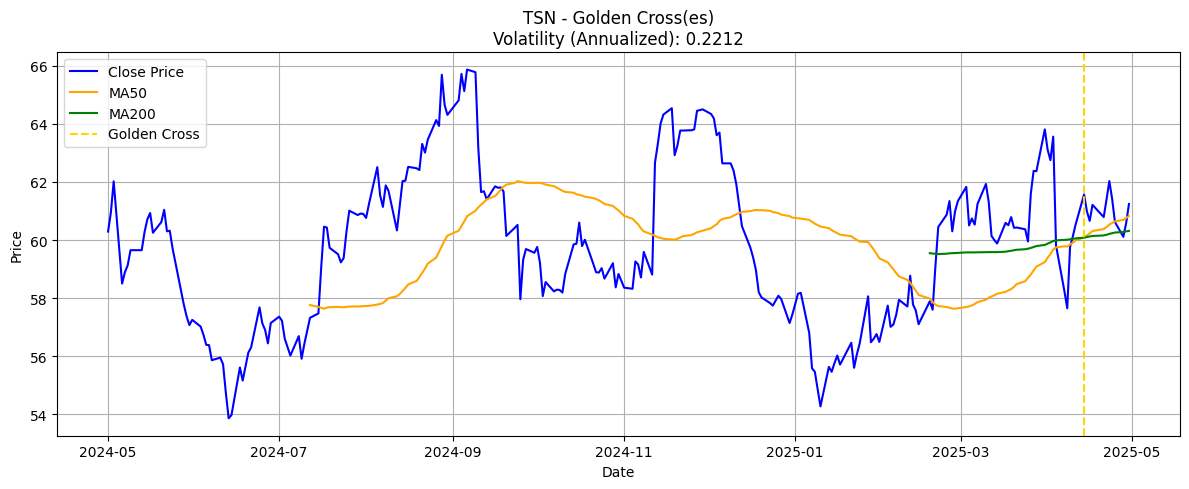

In [13]:
# Display stocks with crosses (e.g., Golden Crosses) in alphabetical order and show volatility

# List of tickers with Golden Crosses

def plot_crosses(tickers, cross_df, title_prefix, color, vol_data):
    for ticker in tickers:
        price = df_close[ticker]
        ma50 = df_ma50[ticker]
        ma200 = df_ma200[ticker]
        cross_dates = pd.to_datetime(cross_df[cross_df['Ticker'] == ticker]['Date'])
        vol = vol_data[ticker]

        plt.figure(figsize=(12, 5))
        plt.plot(price, label='Close Price', color='blue')
        plt.plot(ma50, label='MA50', color='orange')
        plt.plot(ma200, label='MA200', color='green')

        for date in cross_dates:
            plt.axvline(x=date, color=color, linestyle='--', label=f'{title_prefix} Cross')

        plt.title(f"{ticker} - {title_prefix} Cross(es)\nVolatility (Annualized): {vol:.4f}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Orderly execution

golden_sorted = sorted(df_golden_cross_14d['Ticker'].unique())
plot_crosses(golden_sorted, df_golden_cross_14d, "Golden", "gold", volatility)

In [14]:
# Calculate 30-day rolling volatility

df_volatility = df_close.rolling(window=30).std() / df_close.rolling(window=30).mean()

# Display volatility for stocks with recent crosses

for _, row in df_golden_cross_14d.iterrows():
    ticker = row['Ticker']
    date = row['Date']
    print(f"{ticker} - Volatility at {date}: {df_volatility.loc[date, ticker]:.2%}")

AMT - Volatility at 2025-04-28 00:00:00: 2.29%
EW - Volatility at 2025-04-17 00:00:00: 2.04%
TSN - Volatility at 2025-04-14 00:00:00: 2.28%
KDP - Volatility at 2025-04-28 00:00:00: 2.19%
NEM - Volatility at 2025-04-16 00:00:00: 7.38%
MOH - Volatility at 2025-04-28 00:00:00: 4.01%


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

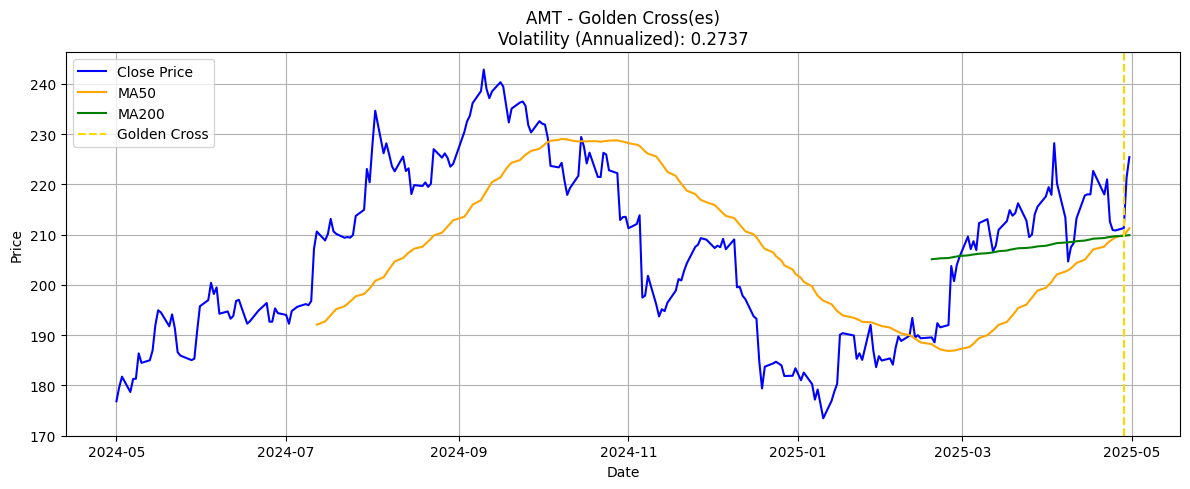

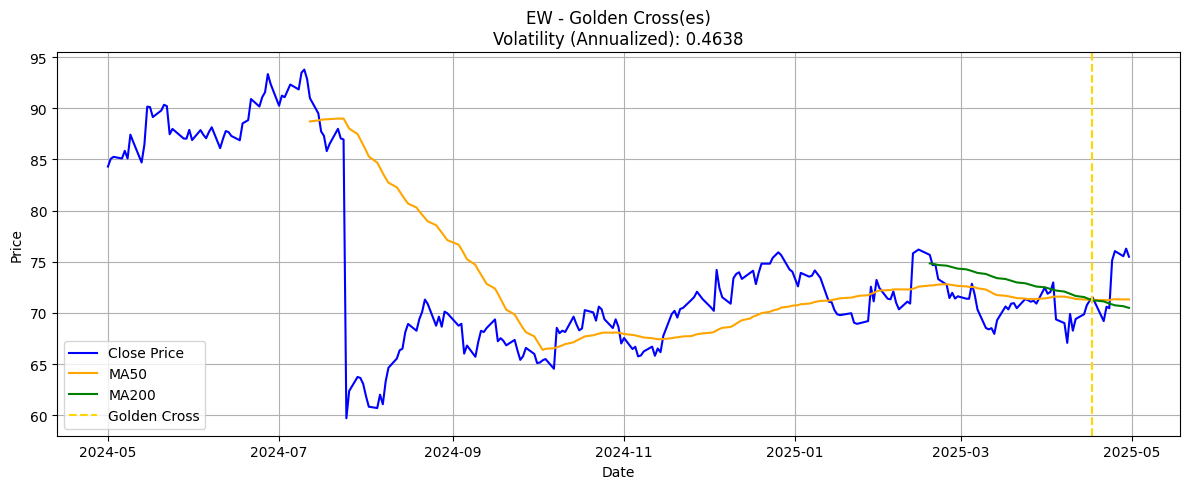

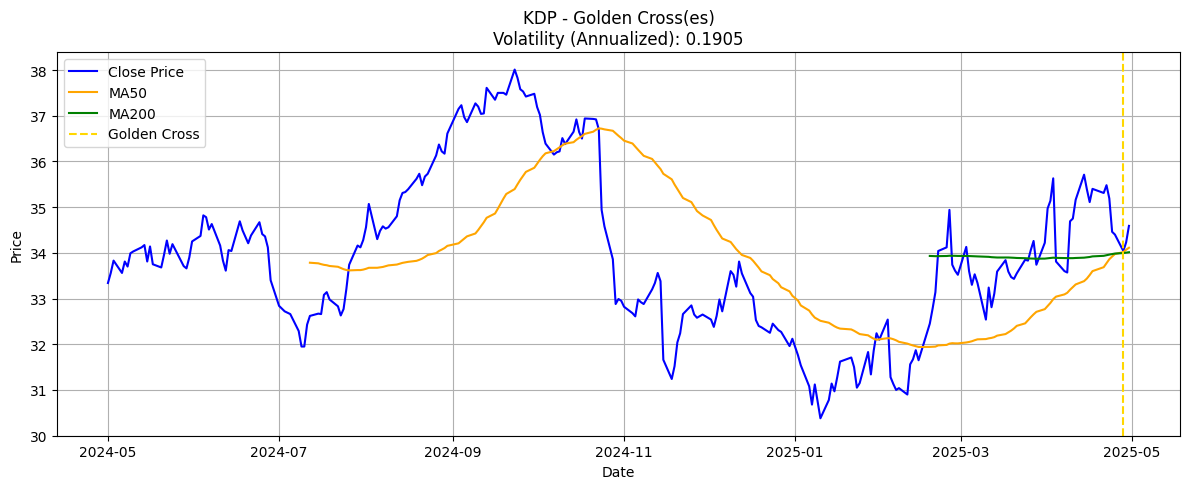

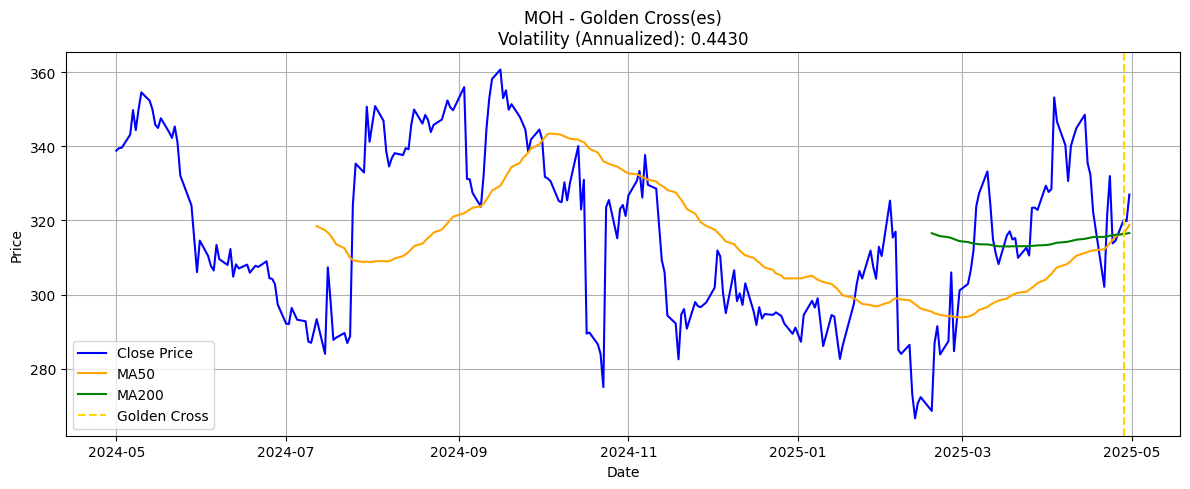

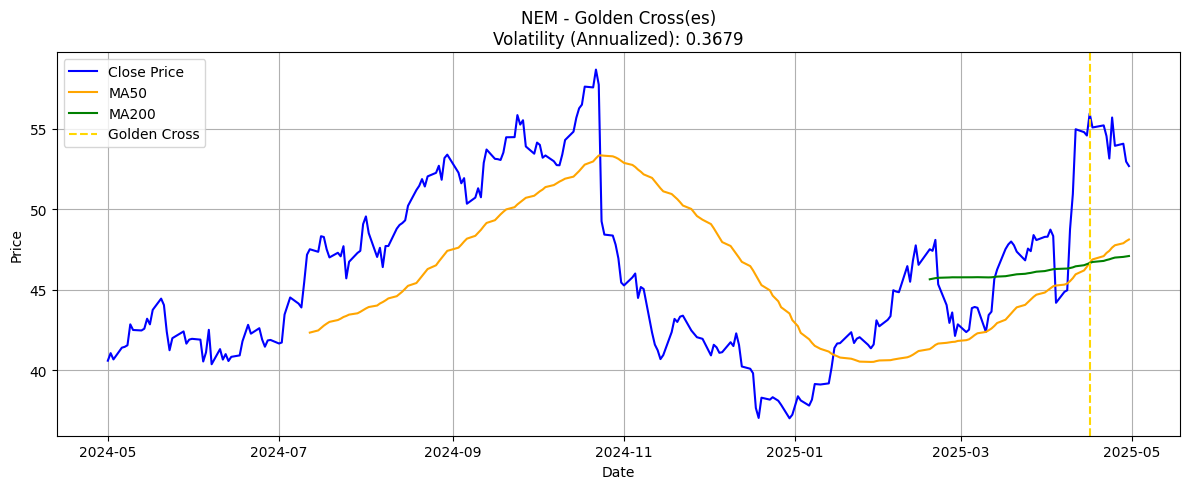

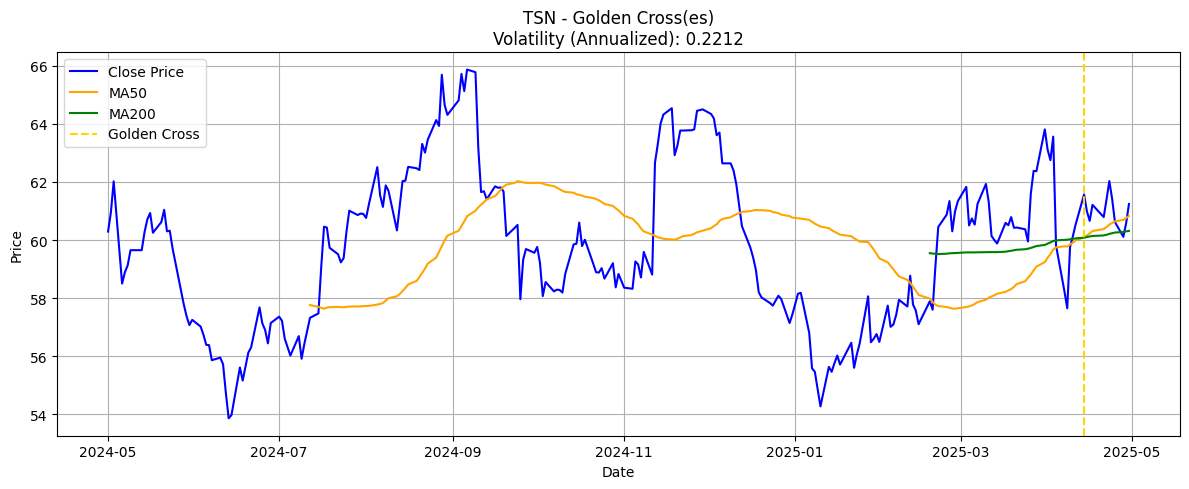

In [15]:
# Plotting top 10 stocks that had Golden Crosses in the last 14 days

# Top 10 Golden Crosses

golden_sorted = sorted(df_golden_cross_14d['Ticker'].unique())
plot_crosses(golden_sorted[:10], df_golden_cross_14d, "Golden", "gold", volatility)

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

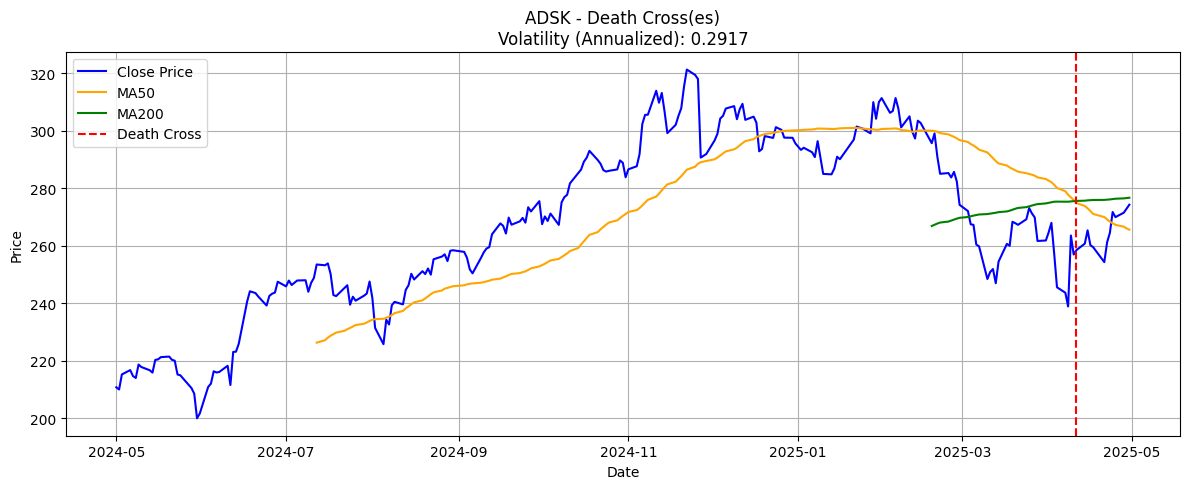

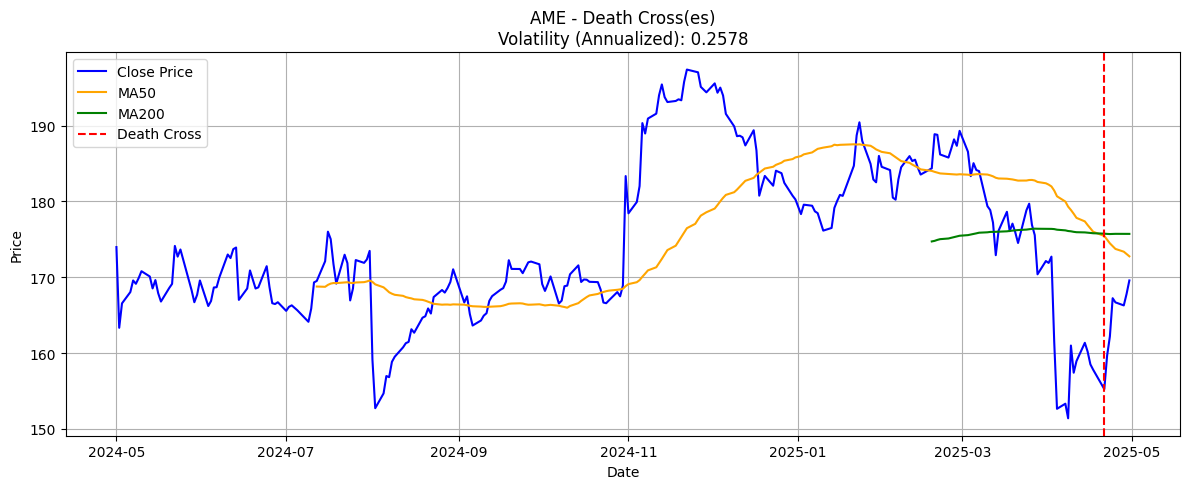

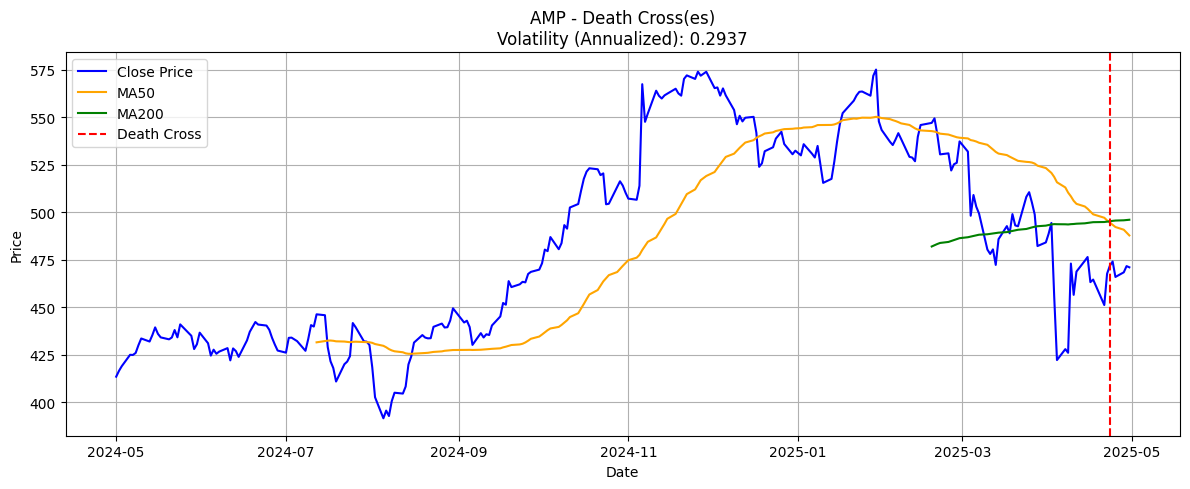

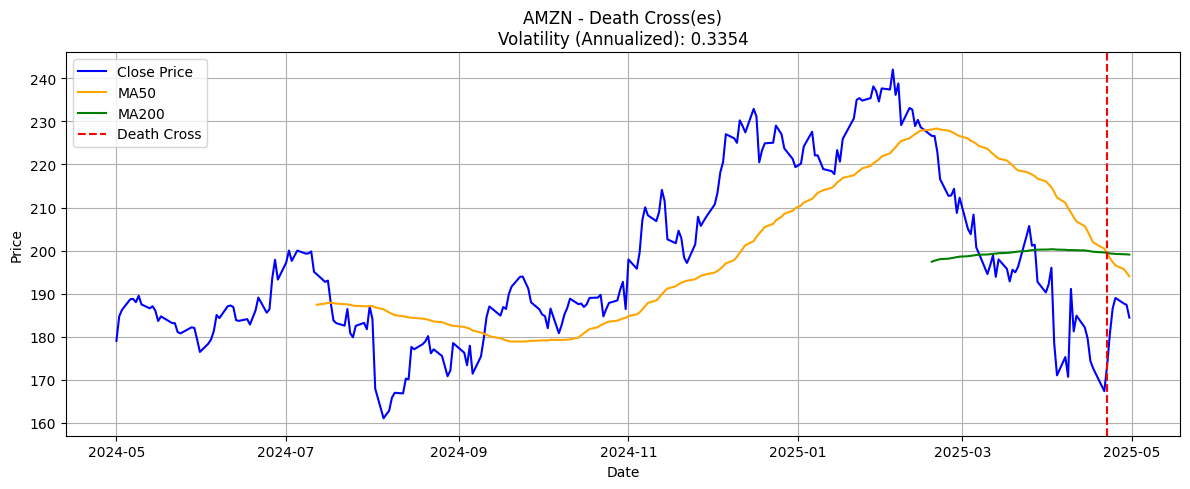

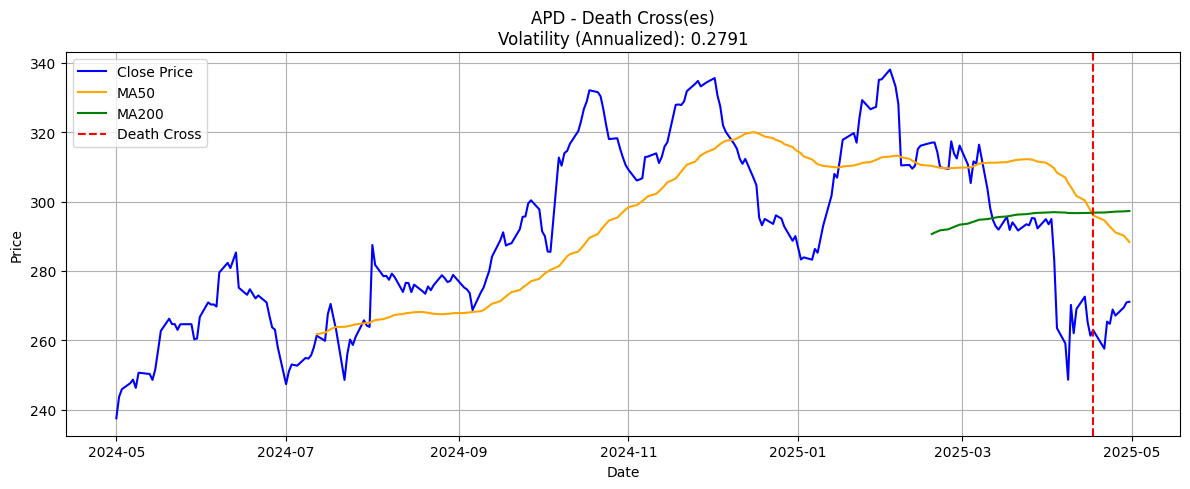

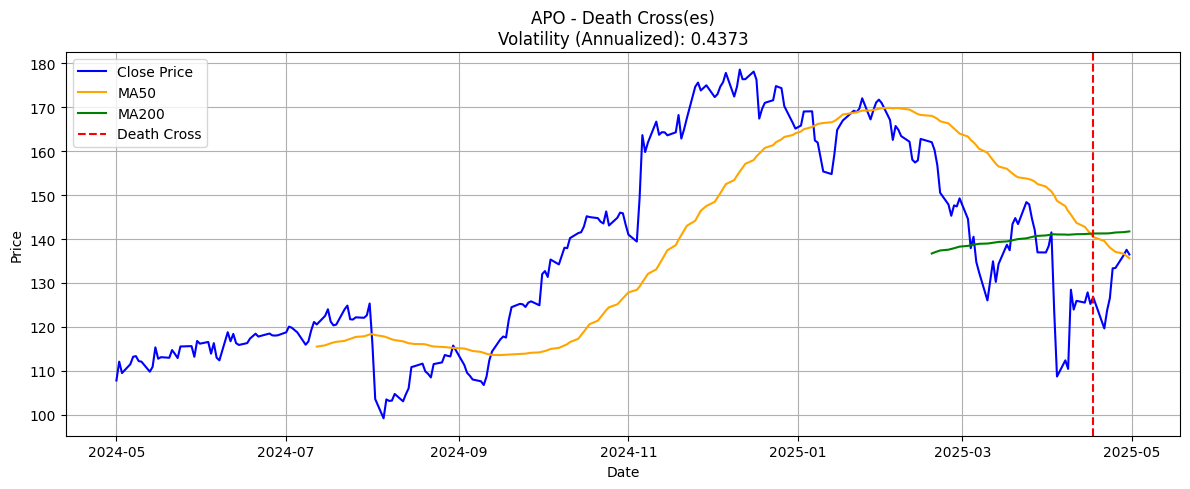

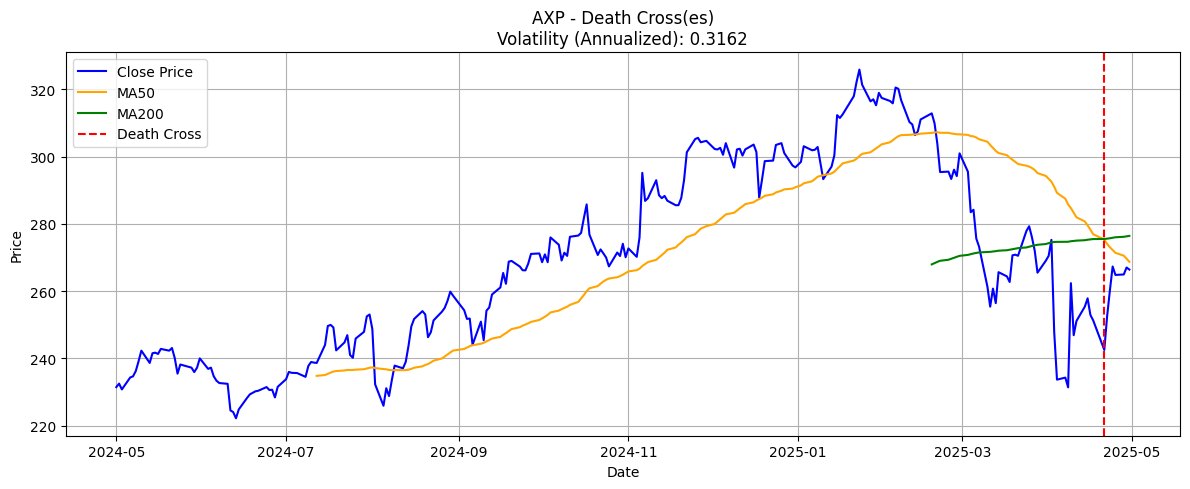

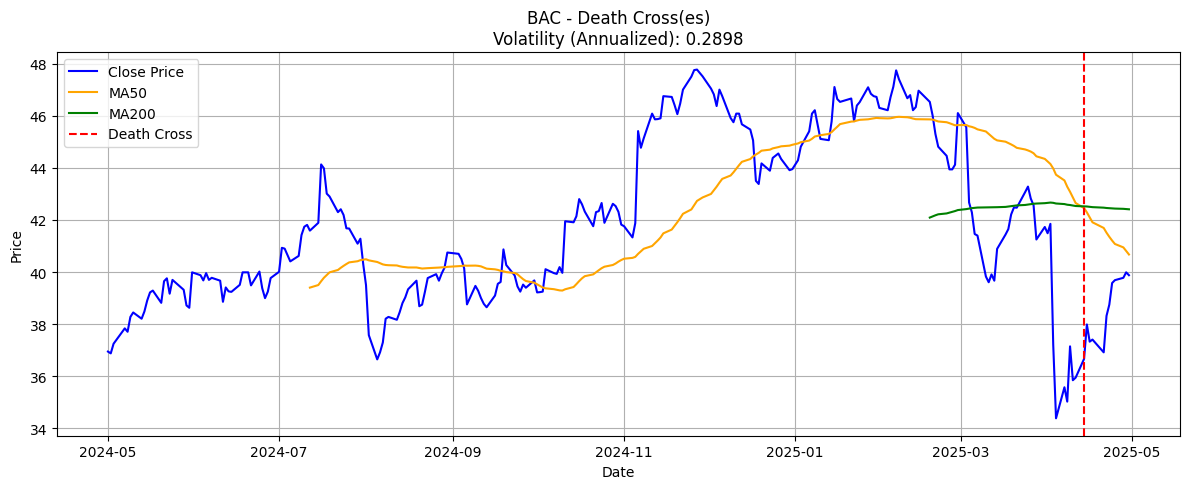

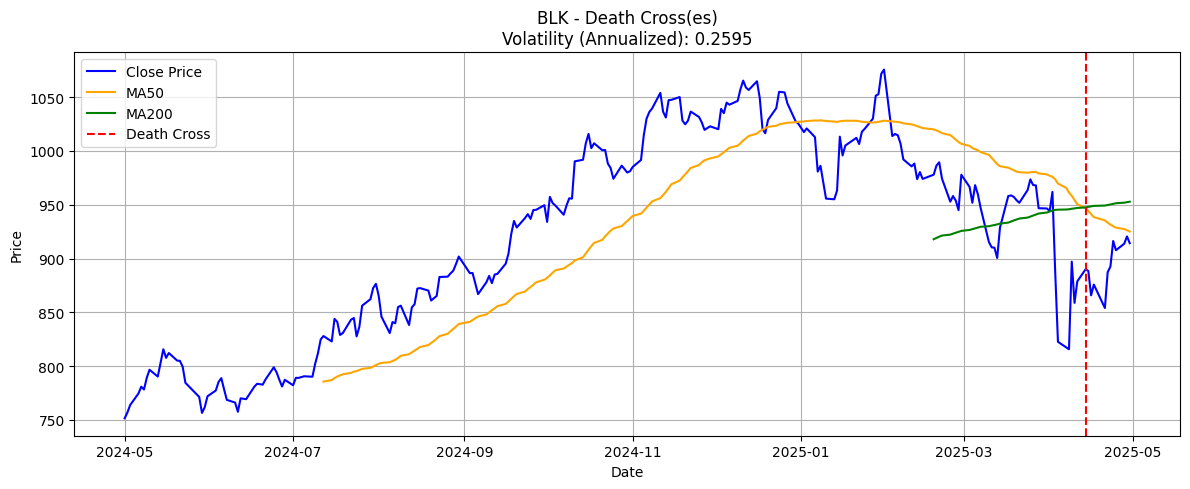

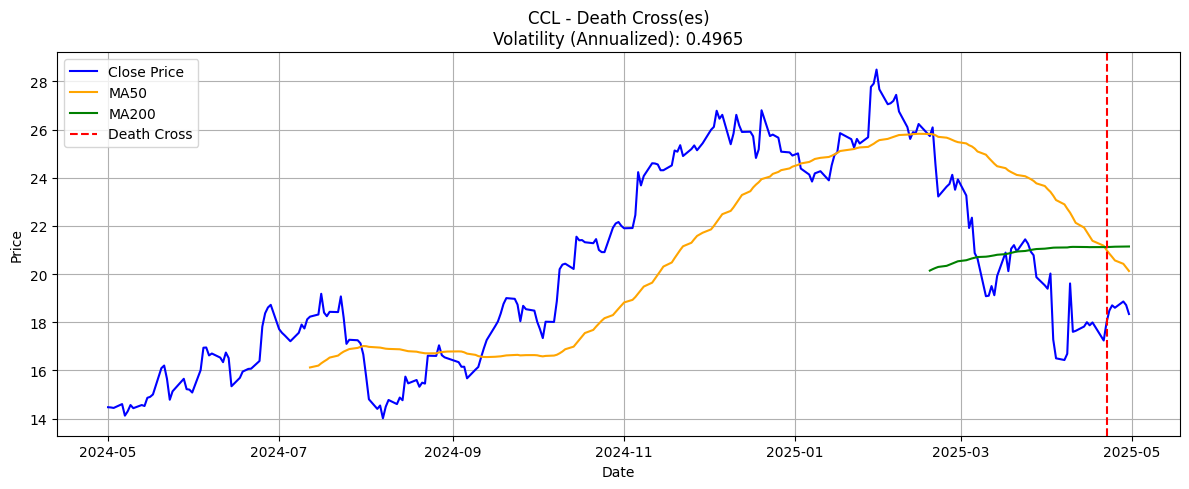

In [16]:
# Plotting top 10 stocks that had Death Crosses in the last 14 days

# Top 10 Death Crosses

death_sorted = sorted(df_death_cross_14d['Ticker'].unique())
plot_crosses(death_sorted[:10], df_death_cross_14d, "Death", "red", volatility)

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross occurs when the short-term moving average (usually the 50-day MA) crosses above the long-term moving average (typically the 200-day MA). This event is widely interpreted as a bullish signal indicating that upward momentum is strengthening and that the stock price may continue to rise. Investors often see it as a sign to buy or hold the stock.


#### What is a Death Cross and how might market participants react to it?

A Death Cross occurs when the 50-day moving average crosses below the 200-day moving average. It is generally considered a bearish signal that suggests downward momentum is increasing and that prices may continue to decline. Market participants might react by selling their positions or avoiding new purchases, anticipating a potential downtrend.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages smooth out price data to help identify trends over time, reducing noise from short-term volatility. The 50-day and 200-day MAs are popular because they represent intermediate and long-term trends, respectively. Their crossover points can highlight shifts in momentum, making them useful tools to detect trend reversals or confirmations.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

Using the last 14 days focuses the analysis on recent market behavior, capturing the most relevant and actionable signals for traders. However, this choice implies a trade-off between timeliness and signal reliability—too short a window may capture false signals or noise, while too long a window could delay reactions to important trend changes.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility measures the degree of price fluctuation, indicating risk and market uncertainty. High volatility around a cross suggests that price movements may be erratic, increasing the risk of false signals. Conversely, low volatility may indicate more stable price trends, making the cross potentially more reliable.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

I would conduct a backtest by simulating trades triggered by Golden Crosses over historical data, calculating performance metrics such as average return, maximum drawdown, and Sharpe ratio. Comparing these results against a benchmark or random strategy would help assess if Golden Crosses generate consistent profits.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Relying solely on technical indicators ignores the company's financial health, industry conditions, and macroeconomic factors. This can lead to poor decisions if price trends contradict fundamental realities, such as deteriorating earnings or sector disruptions, increasing the risk of losses.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

To reduce false signals, I would incorporate filters such as Confirming the cross with volume increases; Using additional indicators like RSI or MACD for momentum confirmation; Applying a minimum price trend persistence after the cross; Incorporating fundamental analysis to validate technical signals.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, sentiment analysis can provide context by showing whether market news and investor mood support or contradict the technical signal. Positive sentiment around a Golden Cross might strengthen the buy signal, while negative news could warn of a potential false positive.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

While the strategy offers a simple entry/exit signal, it is generally not sufficient on its own due to lagging nature and risk of false signals. Traders often combine it with other analyses and risk management techniques before acting.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Volatility analysis typically shows mixed results. Some crosses coincide with strong upward trends, but others occur during high volatility or sideways markets, indicating that Golden Crosses do not always guarantee sustained price increases.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

- Golden and Death Crosses are useful heuristic indicators of potential trend changes but should be considered within a broader analytical framework.

- Recent crosses detected in the last 14 days highlight actionable points for further detailed analysis and monitoring.


Caveats in 2 or 3 bullet points:

- Moving average crosses are lagging indicators and may produce false signals, especially in volatile or sideways markets.

- Incorporating additional technical indicators, fundamental data, and sentiment analysis is essential to improve decision accuracy.

- The strategy requires robust risk management to mitigate losses from false positives.